In [1]:
# Load libraries
import pandas as pd
from sklearn.linear_model import LogisticRegression
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Data Exploration:

In [2]:
#Load Dataset
titanic=pd.read_csv("C:\\Users\\abhil\\OneDrive\\Desktop\\New folder\\Titanic_train.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
#Examine the features and their types
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
titanic.shape

(891, 12)

In [5]:
#Summary statistics
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Performing exploratory data analysis (EDA).

In [6]:
titanic.drop(['PassengerId','Name','Ticket','Cabin'],axis=1,inplace=True)
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [7]:
titanic[titanic.isnull().any(axis=1)].shape

(179, 8)

In [9]:
titanic.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

# 2. Data processing:

In [11]:
#Handle missing values by imputation method
titanic['Age']=titanic.Age.fillna(titanic.Age.median())
titanic['Embarked']=titanic.Embarked.fillna(titanic.Embarked.mode()[0])

In [12]:
# Encode categorical variable
titanic1=pd.get_dummies(data=titanic,dtype=int,drop_first=True)
titanic1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Age         891 non-null    float64
 3   SibSp       891 non-null    int64  
 4   Parch       891 non-null    int64  
 5   Fare        891 non-null    float64
 6   Sex_male    891 non-null    int32  
 7   Embarked_Q  891 non-null    int32  
 8   Embarked_S  891 non-null    int32  
dtypes: float64(2), int32(3), int64(4)
memory usage: 52.3 KB


## Create visualization

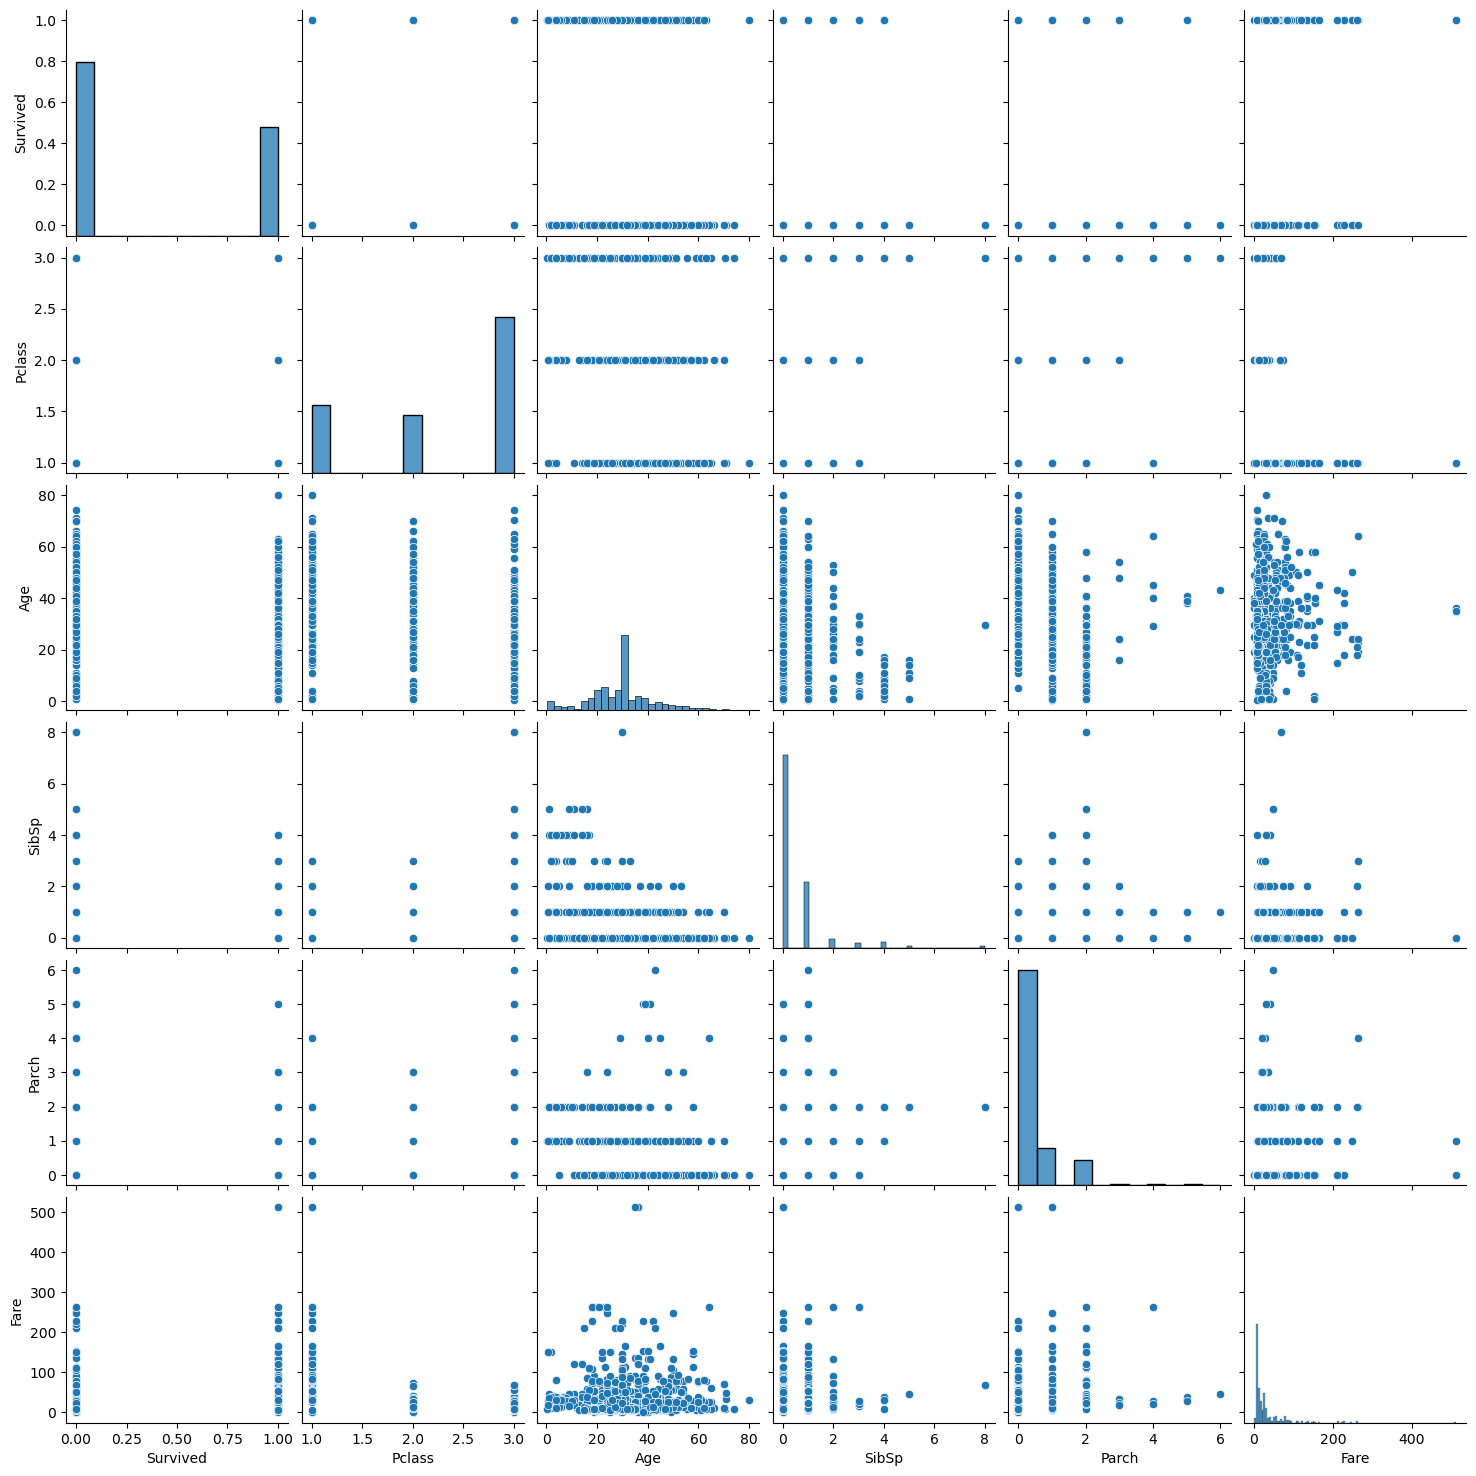

In [13]:
sns.pairplot(titanic)

<Axes: >

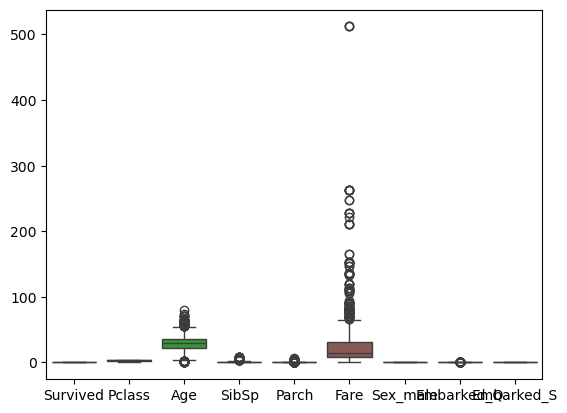

In [14]:
sns.boxplot(data=titanic1)

In [15]:
# To get correlation among the variable
titanic1.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
Survived,1.000000,-0.338481,-0.069809,-0.035322,0.081629,0.257307,-0.543351,0.003650,-0.149683
Pclass,-0.338481,1.000000,-0.331339,0.083081,0.018443,-0.549500,0.131900,0.221009,0.074053
Age,-0.069809,-0.331339,1.000000,-0.232625,-0.179191,0.091566,0.084153,-0.013855,-0.019336
SibSp,-0.035322,0.083081,-0.232625,1.000000,0.414838,0.159651,-0.114631,-0.026354,0.068734
Parch,0.081629,0.018443,-0.179191,0.414838,1.000000,0.216225,-0.245489,-0.081228,0.060814
Fare,0.257307,-0.549500,0.091566,0.159651,0.216225,1.000000,-0.182333,-0.117216,-0.162184
Sex_male,-0.543351,0.131900,0.084153,-0.114631,-0.245489,-0.182333,1.000000,-0.074115,0.119224
Embarked_Q,0.003650,0.221009,-0.013855,-0.026354,-0.081228,-0.117216,-0.074115,1.000000,-0.499421
Embarked_S,-0.149683,0.074053,-0.019336,0.068734,0.060814,-0.162184,0.119224,-0.499421,1.000000


In [16]:
titanic1.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.647587,0.086420,0.725028
std,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429,0.477990,0.281141,0.446751
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000
50%,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200,1.000000,0.000000,1.000000
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,1.000000,0.000000,1.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000


#### To replace outliers

In [17]:
Q1 = titanic1['Age'].quantile(0.25)
Q3 = titanic1['Age'].quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Define the bounds for detecting outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Replace outliers 
titanic1['Age'] = titanic1['Age'].clip(lower=lower_bound, upper=upper_bound)

In [18]:
Q1 = titanic1['SibSp'].quantile(0.25)
Q3 = titanic1['SibSp'].quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Define the bounds for detecting outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Replace outliers 
titanic1['SibSp'] = titanic1['SibSp'].clip(lower=lower_bound, upper=upper_bound)

In [19]:
Q1 = titanic1['Fare'].quantile(0.25)
Q3 = titanic1['Fare'].quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Define the bounds for detecting outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Replace outliers 
titanic1['Fare'] = titanic1['Fare'].clip(lower=lower_bound, upper=upper_bound)

# 3. Model Building:

In [20]:
X = titanic1.iloc[:,1:]
Y = titanic1.iloc[:,0]

In [21]:
X

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,3,22.000000,1.0,0,7.2500,1,0,1
1,1,38.000000,1.0,0,65.6344,0,0,0
2,3,26.000000,0.0,0,7.9250,0,0,1
3,1,35.000000,1.0,0,53.1000,0,0,1
4,3,35.000000,0.0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...
886,2,27.000000,0.0,0,13.0000,1,0,1
887,1,19.000000,0.0,0,30.0000,0,0,1
888,3,29.699118,1.0,2,23.4500,0,0,1
889,1,26.000000,0.0,0,30.0000,1,0,0


In [22]:
Y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [23]:
Y.value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [24]:
from sklearn.model_selection import train_test_split

In [26]:
train_x, test_x, train_y,test_y = train_test_split(X,Y,test_size=0.2,random_state=3)
(train_x.shape,train_y.shape,test_x.shape, test_y.shape)

((712, 8), (712,), (179, 8), (179,))

In [31]:
#fit the model
classifier=LogisticRegression(max_iter=500)
classifier.fit(train_x,train_y)

LogisticRegression(max_iter=500)

In [32]:
print(classifier.intercept_)
print(classifier.coef_)

[4.84216861]
[[-0.92052378 -0.04480322 -0.59729847 -0.18753067  0.02059715 -2.68585145
  -0.05613691 -0.56120789]]


# 4. Model Evaluation:

In [33]:
model_train=LogisticRegression()
model_train.fit(train_x,train_y)

from sklearn.metrics import classification_report
print('classification report for training')
print(classification_report(train_y,model_train.predict(train_x)))

print('classification report for testing')
print(classification_report(test_y,model_train.predict(test_x)))

classification report for training
              precision    recall  f1-score   support

           0       0.82      0.87      0.85       440
           1       0.77      0.69      0.73       272

    accuracy                           0.80       712
   macro avg       0.80      0.78      0.79       712
weighted avg       0.80      0.80      0.80       712

classification report for testing
              precision    recall  f1-score   support

           0       0.83      0.79      0.81       109
           1       0.70      0.76      0.73        70

    accuracy                           0.78       179
   macro avg       0.77      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179



C:\Users\abhil\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [34]:
pd.DataFrame(classifier.predict_proba(train_x))

,0,1
0,0.901640,0.098360
1,0.055632,0.944368
2,0.295812,0.704188
3,0.027992,0.972008
4,0.879690,0.120310
...,...,...
707,0.019023,0.980977
708,0.791407,0.208593
709,0.938606,0.061394
710,0.923903,0.076097


In [35]:
y_pred_df= pd.DataFrame({'actual': train_y,
                         'predicted': classifier.predict(train_x)})
y_pred_df.head()

,actual,predicted
146,1,0
195,1,1
786,1,1
290,1,1
521,0,0


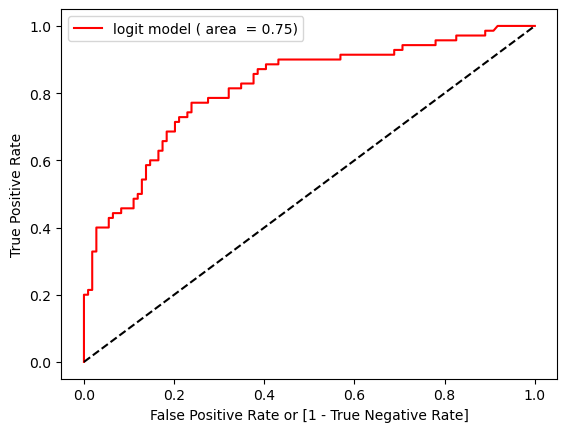

In [36]:
# Visualize the ROC curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
fpr, tpr, thresholds = roc_curve(test_y, classifier.predict_proba (test_x)[:,1])

auc =np.round( roc_auc_score(test_y, classifier.predict(test_x)),2)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label=f'logit model ( area  = {auc})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [37]:
titanic_test=pd.read_csv("C:\\Users\\abhil\\OneDrive\\Desktop\\New folder\\Titanic_test.csv")
titanic_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [38]:
titanic_test.drop(['Name','Ticket','Cabin','PassengerId'],axis=1,inplace=True)
titanic_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


In [39]:
titanic_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       332 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      417 non-null    float64
 6   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 23.0+ KB


In [40]:
titanic_test[titanic_test.isnull().any(axis=1)].shape

(87, 7)

In [41]:
titanic_test.isnull().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

In [42]:
titanic_test['Age']=titanic_test.Age.fillna(titanic_test.Age.mean())
titanic_test['Fare']=titanic_test.Fare.fillna(titanic_test.Fare.median())

In [43]:
titanic_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       418 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      418 non-null    float64
 6   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 23.0+ KB


In [44]:
titanic_test.describe()

,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000
mean,2.265550,30.272590,0.447368,0.392344,35.576535
std,0.841838,12.634534,0.896760,0.981429,55.850103
min,1.000000,0.170000,0.000000,0.000000,0.000000
25%,1.000000,23.000000,0.000000,0.000000,7.895800
50%,3.000000,30.272590,0.000000,0.000000,14.454200
75%,3.000000,35.750000,1.000000,0.000000,31.471875
max,3.000000,76.000000,8.000000,9.000000,512.329200


In [45]:
titanic_test1=pd.get_dummies(data=titanic_test,dtype=int,drop_first=True)
titanic_test1.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,3,34.5,0,0,7.8292,1,1,0
1,3,47.0,1,0,7.0000,0,0,1
2,2,62.0,0,0,9.6875,1,1,0
3,3,27.0,0,0,8.6625,1,0,1
4,3,22.0,1,1,12.2875,0,0,1


In [46]:
pred = classifier.predict(titanic_test1)

# 5. Interpretation:

#### a. Interpret the coefficients of the logistic regression model.

##### The coefficients of the logistic regression model are:
Intercept=4.842
Pclass=-0.92
Age=-0.04
SibSp=-0.59
Parch=-0.18
Fare=0.02
sex_male=-2.68
Embarked_Q=-0.056
Embarked_S=-0.56

##### b. Discuss the significance of features in predicting the target variable (survival probability in this case).]]

The variables that affect most in predicting the survival variable or target variable are Pclass,sex and Sibp.

This means:

For each unit increase in Pclass,the surviaval probability decrease by 0.92.

For each unit increase in sex,the surviaval probability decrease by 2.68.

For each unit increase in Sibp,the surviaval probability decrease by 0.59.

# 6.Deployment

In [47]:
import pickle
filename='logistic.pkl'
pickle.dump(classifier,open(filename,'wb'))

# 7. Interview question

### 1. What is the difference between precision and recall?

Precision and recall are metrics used to evaluate classification models.Precision is the ratio of correctly predicted positive observations to the total predicted positives while Recall (also known as Sensitivity or True Positive Rate) is the ratio of correctly predicted positive observations to all observations in the actual class.

### 2. What is cross-validation, and why is it important in binary classification?

Cross-validation involves dividing the dataset into multiple subsets, training the model on some subsets, and testing it on the remaining subsets. The most common form of cross-validation is k-fold cross-validation.

Cross-validationis important in binary classification because it helps identify overfitting by evaluating model performance on unseen data.